# Create Dummy Profile for Transport Solver (创建“Dummy Profile”)

In [1]:
import numpy as np 
import scipy.stats
import scipy.integrate
import sys



## Geometric metric

$$
V^{\prime}\left(\rho\right)=\frac{\partial V}{\partial\rho}=2\pi\int_{0}^{2\pi}\sqrt{g}d\theta=2\pi\oint\frac{R}{\left|\nabla\rho\right|}dl.
$$

$$
V^{\prime\prime}   = 1-\rho\frac{\partial}{\partial\rho}\ln\left(F\cdot\left\langle \frac{1}{R^{2}}\right\rangle \right)
$$


The flux surface average of an arbitrary function  $$ \alpha\left( r \right) $$ is denfined as

$$
\left\langle \alpha\right\rangle = \frac{2\pi}{V^{\prime}}\int_{0}^{2\pi}\alpha\sqrt{g}d\theta = \frac{2\pi}{V^{\prime}}\oint\alpha\frac{R}{\left|\nabla\rho\right|}dl
$$






## Current Transport  

Current transport equation

$$ 
\sigma_{\parallel}\left(\frac{\partial}{\partial t}-\frac{\dot{B}_{0}}{2B_{0}}\frac{\partial}{\partial\rho}\rho\right)\Psi+\frac{F^{2}}{\mu_{0}B_{0}\rho}\frac{\partial}{\partial\rho}\left[-\frac{V^{\prime}}{4\pi^{2}}\left\langle \left|\frac{\nabla\rho}{R}\right|^{2}\right\rangle \frac{1}{F}\frac{\partial\Psi}{\partial\rho}\right]=-\frac{V^{\prime}}{2\pi\rho}\left(j_{ni,exp}+j_{ni,imp}\Psi\right)
$$

where $F=R B_{\phi}$

## Particle Transport 

Particle Transport equation
$$
  \left(\frac{\partial}{\partial t}-\frac{\dot{B}_{0}}{2B_{0}}\frac{\partial}{\partial\rho}\rho\right)\left(V^{\prime}n_{s}\right)+\frac{\partial}{\partial\rho}\Gamma_{s}=V^{\prime}\left(S_{s,exp}-S_{s,imp}\cdot n_{s}\right)
$$

where 
$$
\Gamma_{s}\equiv V^{\prime}\left\langle \left|\nabla\rho\right|^{2}\right\rangle \left(-D_{s}\cdot\frac{\partial n_{s}}{\partial\rho}+v_{s}^{pinch}\cdot n_{s}\right)
$$





## Energy Transport 


$$
\frac{3}{2}\left(\frac{\partial}{\partial t}-\frac{\dot{B}_{0}}{2B_{0}}\frac{\partial}{\partial\rho}\rho\right)\left(n_{s}T_{s}V^{\prime\frac{5}{3}}\right)+V^{\prime\frac{2}{3}}\frac{\partial}{\partial\rho}\left(q_{s}+T_{s}\Gamma_{s}\right)=V^{\prime\frac{5}{3}}\left[Q_{s,exp}-Q_{s,imp}\cdot T_{s}+Q_{es}+Q_{zs}+Q_{\gamma s}\right]
$$
                
where

$$ 
q_{s}=V^{\prime}\left\langle \left|\nabla\rho\right|^{2}\right\rangle n_{s}\left(-\chi_{s}\frac{\partial T_{s}}{\partial\rho}+T_{s}v_{T_{s}}^{pinch}\right)

$$


In [2]:
rho_tor_norm =np.sqrt(np.linspace(0,1.0,129))
x=rho_tor_norm
rho_ped=0.9 
Lns = 1-rho_ped
n0=1.0e19
rho_tor_boundary=2.5
D_ped=2.5
H=4.0*(scipy.constants.pi**2)*2.0

### Edge 边界区分布

Density decay length $$ L_{n}= -\frac{ R n^{\prime}}{n} = \frac{R v}{D} $$

In Edge region

$$
\frac{1}{\rho_{b}}\frac{\partial}{\partial x}\left[V^{\prime}\left\langle \left|\nabla\rho\right|^{2}\right\rangle \left(-\frac{D_{s}}{\rho_{b}}\cdot\frac{\partial n_{s}}{\partial x}\right)\right]=V^{\prime}S_{s,exp}
$$

Define

$$
\mathbb{S}\left(x\right)\equiv \int_{0}^{x}V^{\prime}S_{s,exp}
$$
then 
$$
\frac{\partial n_{s}}{\partial x}=-\frac{\rho_{b}^{2}}{D_{s}\left\langle \left|\nabla\rho\right|^{2}\right\rangle V^{\prime} }\mathbb{S}\left(x\right)
$$


In [3]:
from sympy import *
from sympy.functions import exp



In [12]:
x,w,rho_ped=symbols("x w rho_ped ")
# ns=nc + dnc*(1-rho_ped)*(1  - exp((x-rho_ped)/(1 -rho_ped)))
def n_core(x):return (1-(x/w)**2)**2
def dn_core(x):return diff(n_core(x),x)
def n_ped(x):return n_core(rho_ped) - (1.0-rho_ped) *  dn_core(rho_ped) * (1.0 -  exp((x-rho_ped)/(1.0-rho_ped)))

diff(n_core(x),x)

-4*x*(1 - x**2/w**2)/w**2

In [17]:
simplify(diff(n_ped(x),x)/exp((x-rho_ped)/(1.0-rho_ped))/dn_core(rho_ped))

1

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [27]:

def n_core(x):return (1-(x/w)**2)**2
def dn_core(x):return -4*x* (1-(x/w)**2)**2/(w**2)
def n_ped(x):return n_core(rho_ped) - (1.0-rho_ped) *  dn_core(rho_ped) * (1.0 -  np.exp((x-rho_ped)/(1.0-rho_ped)))


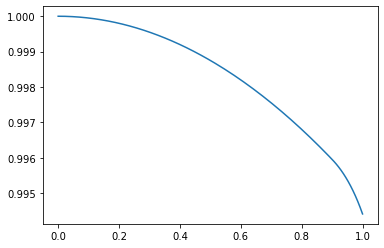

In [40]:
w=20
rho_ped=0.9
x=np.linspace(0,1,129)
plt.plot(x,n_core(x)*(x<rho_ped)+n_ped(x)*(x>=rho_ped) )


In [19]:
 simplify(diff(exp(x/(1.0-rho_ped))*x ,x)/x )

(rho_ped - x - 1.0)*exp(-x/(rho_ped - 1.0))/(x*(rho_ped - 1.0))

In [8]:
integrate(exp(x/rho_ped)/x,x)

Ei(x/rho_ped)

In [11]:
lhs=diff((1-(x/3)**2)**2,x) 
rhs= -4*x*(1-x**2/9)/9
expand(lhs-rhs)

0

0.7655545414440909

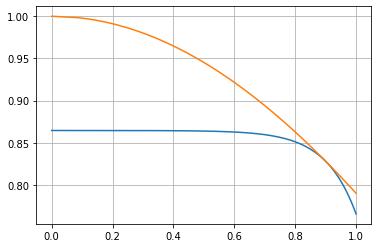

In [10]:
def n_core(x): return (1-(x/3)**2)**2

def dn_core(x): return -4*x*(1-x**2/9)/9

def n_ped(x): return  n_core(rho_ped) - (1.0-rho_ped) * \
            dn_core(rho_ped) * (1 - np.exp((x-rho_ped)/(1-rho_ped)))

plt.plot(x ,n_ped(x ))
plt.plot(x ,n_core(x ))
plt.grid()
n_ped(1)

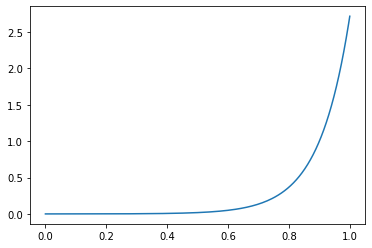

In [4]:
def S_edge(x):return  np.exp((x-rho_ped)/(1.0-rho_ped)) 
plt.plot(x,S_edge(x))

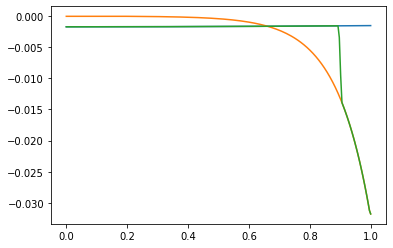

In [63]:
plt.plot(x,np.gradient(n_core(x)))
plt.plot(x,np.gradient(n_ped(x)))
plt.plot(x,np.gradient(ns(x)))

In [30]:

def n_core_func(x): return n0*((1-(x/3)**2)**2)

n_core = Profile(n_core_func, axis=rho_tor_norm)

def ped_shape(x):
    return 2-np.exp((x-rho_ped)/Lns)

n_ped = n_core_func(rho_ped) * Profile(ped_shape, axis=rho_tor_norm)

ns = n_core*(rho_tor_norm < rho_ped) + n_ped * (rho_tor_norm >= rho_ped)

S_edge = - (n_ped).derivative/rho_tor_boundary/D_ped



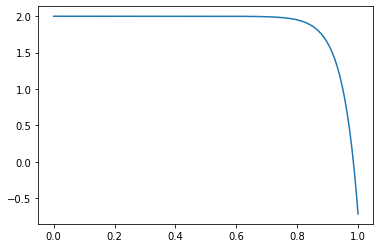

In [12]:
plt.plot(x,np.vectorize(ped_shape)(x))

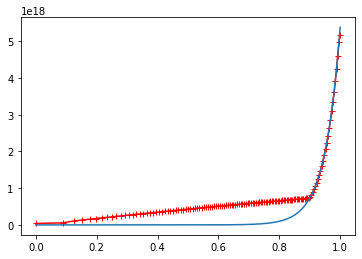

In [2]:
x=np.sqrt(np.linspace(0,1.0,129))

n0=1.0e19
rho_bdry=0.9 
D_bdry=0.2
rho_tor_boundary=0.25


def n_core_func(x): return n0*((1-(x/3)**2)**2) 

n_core=Profile(n_core_func,axis=x)

def int_s_edge_func(x ): return -D_bdry* n_core.derivative(rho_bdry)/rho_tor_boundary * np.exp((x-rho_bdry)*20) 


int_S_edge =   np.array([int_s_edge_func(s)  for s in x])

# n_core = np.piecewise(x, [x<rho_bdry, x >= rho_bdry], [n_core_func, n_core_func(rho_bdry)])

n_ped=n_core_func(rho_bdry)

def n_ped_func(x): return  n_ped + scipy.integrate.quad(int_s_edge_func, rho_bdry,x )[0]*(-rho_tor_boundary/D_bdry)

S_edge=Profile(int_s_edge_func(x) ,axis=x).derivative

ne =Profile( np.piecewise(x, [x<rho_bdry, x >= rho_bdry], [n_core_func, lambda r:[n_ped_func(s) for s in r]]),axis=x)

plt.plot(x, -D_bdry*ne.derivative,"-+",label=r"$n_{e}$",color="r")

plt.plot(x, int_S_edge *rho_tor_boundary, label=r"$S_{edge}$")



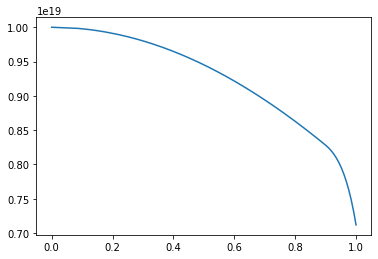

In [3]:
plt.plot(x ,  ne )

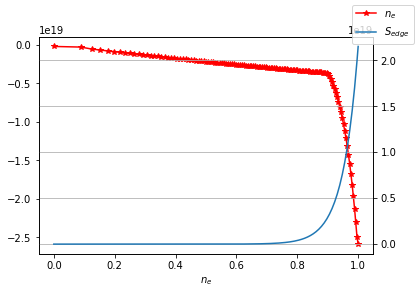

In [4]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$n_{e}$")
ax1.plot(x, ne.derivative,"-*",label=r"$n_{e}$",color="r")
ax2 = ax1.twinx()
ax2.plot(x,int_S_edge,label=r"$S_{edge}$")
fig.legend()
plt.grid()

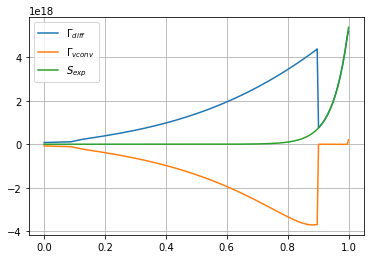

In [5]:
D = np.piecewise(x, [x < rho_bdry, x > rho_bdry], [lambda x:2.0 * D_bdry + (x**2), D_bdry])

d = Profile(D, axis=x )

plt.plot(x , -d*ne.derivative, label=r"$\Gamma_{diff}$" )

v=( d*ne.derivative + int_S_edge*rho_tor_boundary)/ne


plt.plot(x , v*ne, label=r"$\Gamma_{vconv}$" )

plt.plot(x ,  int_S_edge*rho_tor_boundary, label=r"$S_{exp}$")

plt.legend()
plt.grid()

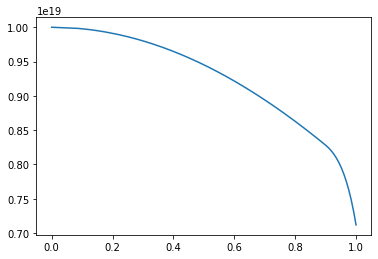

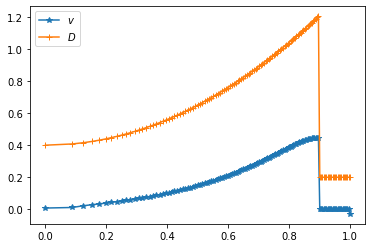

In [96]:
plt.plot(x , -v ,"-*", label=r"$v$" )

plt.plot(x , d,"-+", label=r"$D$")
plt.legend()

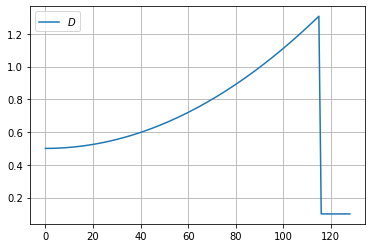

In [2]:
x=np.linspace(0.0,1.0,129)

n0=1.0e19

D_bdry=0.1
rho_bdry=0.9 

rho_src_bdry= 0.8

D=np.piecewise( x, [x < rho_bdry,x > rho_bdry], [lambda x:0.5+   (x**2 ), D_bdry])
# V=np.piecewise( x, [x < rho_bdry,x > rho_bdry], [lambda x:-(x**3)  , 0 ])

S_pel=Profile(scipy.stats.norm.pdf((x-0.7)/0.1)*np.sqrt(scipy.constants.pi*2.0) ,axis=x)


def s_edge(x):return 100*((x-rho_src_bdry)/(1.0-rho_src_bdry))**2

S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >=rho_src_bdry],[0,s_edge]), axis=x)

def int_s_edge(x ):return scipy.integrate.quad(s_edge,rho_src_bdry,x)[0]

int_S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >= rho_src_bdry], [0, lambda r:np.array([ int_s_edge(s) for s in r])]), axis=x)


d = Profile(D, axis=x)
# v = Profile(V, axis=x)
plt.plot(d,label=r"$D$")
# plt.plot(v, label=r"|v|")
plt.grid()
plt.legend()

In [3]:
def n_ped_prime(x): return scipy.integrate.quad(s_edge,rho_src_bdry,x )[0]

n_ped_bdr=((1-(rho_bdry/3)**2)**2) 

def n_core(x,  w=3): return ((1-(x/w)**2)**2) if x<rho_bdry else n_ped_bdr

def n_ped(s):return -scipy.integrate.quad(n_ped_prime,rho_src_bdry,s )[0] /D_bdry/n_ped_bdr if (s>rho_src_bdry) else 0  

n_e=Profile(lambda x:n_core(x) *(1.0 + n_ped(x)) ,axis=x)


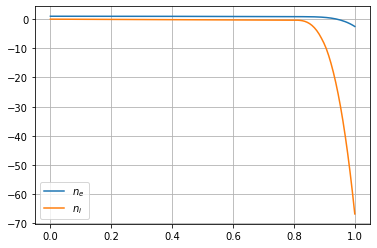

In [4]:
n_He=0.08 * (1-x**2)**2
n_Be=0.02*n_e
n_Ar=0.0005*n_e
n_i=n_e - (n_Be*4+n_Ar*18+n_He*2) 
# plt.plot(x,n_He,label=r"$n_{He}$" )
plt.plot(x,n_e,label=r"$n_e$" )
plt.plot(x,n_e.derivative,label=r"$n_i$" )
plt.legend()
plt.grid()

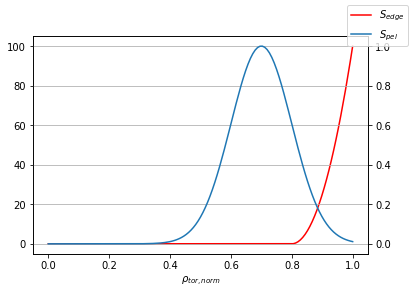

In [6]:

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$\rho_{tor,norm}$")
ax1.plot(x, S_edge,label=r"$S_{edge}$",color="r")
ax2 = ax1.twinx()
ax2.plot(x,S_pel,label=r"$S_{pel}$")
fig.legend()
plt.grid()

In [7]:
def int_s_edge(x ):return scipy.integrate.quad(s_edge,rho_src_bdry,x)[0]
int_S_edge=Profile(np.piecewise(x, [x<rho_src_bdry, x >= rho_src_bdry], [0, lambda r:np.array([ int_s_edge(s) for s in r])]), axis=x)


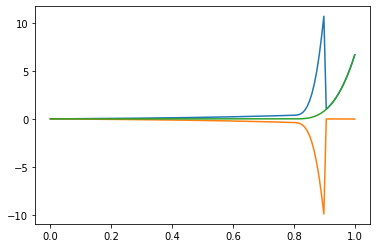

In [8]:
plt.plot(x , -d*n_e.derivative )
v=(d*n_e.derivative+int_S_edge)/n_e
plt.plot(x , v*n_e )
plt.plot(x ,  int_S_edge)


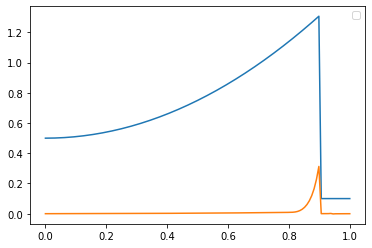

In [23]:
plt.plot(x, d)
plt.plot(x, -v/50)

plt.legend()

In [11]:
a=np.linspace(0,1.0,20)*(a<0.5)

In [12]:
a

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])